In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load data
df = pd.read_csv("glassdoor_jobs.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD)
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD)
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD)
3,Data Scientist 2,Employer Provided Salary:$94K - $183K,The Microsoft 365 team is looking for a Data S...,4.3,Microsoft\n4.3,"Redmond, WA",10000+ Employees,1975,Company - Public,Computer Hardware Development,Information Technology,$10+ billion (USD)
4,Entry Level Data Scientist 2023/2024,$48K - $78K (Glassdoor est.),"You may not realize it, but you’ve likely used...",3.9,CPChem\n3.9,"The Woodlands, TX",1001 to 5000 Employees,2000,Company - Private,Chemical Manufacturing,Manufacturing,$10+ billion (USD)


# Data Cleaning 

In [4]:
# check for missing data
null_counts = df.isnull().sum()
print(null_counts)

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64


In [5]:
# removing entries with no salary estimate
df_cleaned = df[df['Salary Estimate'] != "-1" ]

In [6]:
# Apply lowercase transformation to all values in the DataFrame
df_cleaned = df_cleaned.map(lambda x: x.lower() if isinstance(x, str) else x)

In [7]:
# removing space from column names for easier analysis
df_cleaned.rename(columns={'Job Title': 'job_title', 'Salary Estimate': 'salary_estimate', 'Job Description': 'job_description', 'Rating': 'rating', 'Company Name': 'company_name', 'Location': 'location', 'Size':'size', 'Founded':'founded', 'Type of ownership': 'type_of_ownership', 'Industry': 'industry', 'Sector':'sector', 'Revenue':'revenue'}, inplace=True)

In [8]:
df_cleaned['salary_estimate'] = df_cleaned['salary_estimate'].apply(lambda x: x.split('(')[0])

In [9]:
df_cleaned['salary_estimate'] = df_cleaned['salary_estimate'].map(lambda x: x.replace('k', '').replace(" ", "").replace('$', '').replace(':', ''))

In [10]:
df_cleaned['salary_estimate'] = df_cleaned['salary_estimate'].map(lambda x: x.replace('employerprovidedsalary', ''))

In [11]:
df_cleaned['salary_estimate'] = df_cleaned['salary_estimate'].apply(lambda x: x.replace('perhour', ''))

In [12]:
# Cleaning the company name column - removing numbers and special characters from the company name. 
df_cleaned['company_name'] = df_cleaned['company_name'].map(lambda x: x[:-4] if '\n' in x else x)

In [13]:
df_cleaned

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,type_of_ownership,industry,sector,revenue
1,2024 university graduate - data scientist,83-153,our company\n\nchanging the world through digi...,4.4,adobe,"san jose, ca",10000+ employees,1982,company - public,computer hardware development,information technology,$5 to $10 billion (usd)
2,data scientist – entry level 2024,71-133,introduction\nranked by forbes as one of the w...,3.9,ibm,"atlanta, ga",10000+ employees,1911,company - public,information technology support services,information technology,$10+ billion (usd)
3,data scientist 2,94-183,the microsoft 365 team is looking for a data s...,4.3,microsoft,"redmond, wa",10000+ employees,1975,company - public,computer hardware development,information technology,$10+ billion (usd)
4,entry level data scientist 2023/2024,48-78,"you may not realize it, but you’ve likely used...",3.9,cpchem,"the woodlands, tx",1001 to 5000 employees,2000,company - private,chemical manufacturing,manufacturing,$10+ billion (usd)
5,data scientist (c),65.00-75.00,the team:\nat client’s artificial intelligence...,-1.0,ivid tek inc,remote,1 to 50 employees,-1,company - public,-1,-1,unknown / non-applicable
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,global technology transformation analytics vic...,128-190,job description\n\nthe global technology trans...,4.0,jpmorgan chase & co,"new york, ny",10000+ employees,1799,company - public,banking & lending,financial services,$10+ billion (usd)
1496,senior data scientist,145,job summary:\nwe are seeking a talented and ex...,4.3,cydcor,"agoura hills, ca",51 to 200 employees,1994,company - private,advertising & public relations,media & communication,$5 to $25 million (usd)
1497,remote - data scientist,79-120,"we’re looking for talented professionals, anyw...",3.0,green dot corporation,remote,1001 to 5000 employees,1999,company - public,financial transaction processing,financial services,$1 to $5 billion (usd)
1498,market data analyst,53-77,summary:\n**please note - this is not a techni...,-1.0,s4 market data,"trenton, nj",unknown,-1,company - private,information technology support services,information technology,unknown / non-applicable


# EDA

In [14]:
# creating a boolean column for verifying data with hourly salary estimate 
df_cleaned['hourly'] = df_cleaned['salary_estimate'].map(lambda x: 1 if 'perhour' in x.lower() else 0)

In [15]:
# creating min_salary, max_salary and avg_salary
df_cleaned['min_salary'] = df_cleaned['salary_estimate'].map(lambda x: round(float(x.split('-')[0])))
df_cleaned['max_salary'] = df_cleaned['salary_estimate'].map(lambda x: round(float(x.split('-')[-1])))
df_cleaned['avg_salary'] = (df_cleaned.min_salary + df_cleaned.max_salary)/2

In [16]:
#creating a new feature called 'state'
df_cleaned['state'] = df_cleaned.location.map(lambda x: x.split(",")[-1].strip())

In [17]:
# standardizing job titles
junior_ds = ['entry level', 'jr data scientist','jr.', 'junior data scientist', 'level 1', 'data scientist i', 'trainee', 'data scientist 1', 'college graduate']
ds = ['data scientist 2', 'data scientist', 'data science', 'machine learning', 'scientist'] 
senior_ds = ['senior data scientist', 'sr data scientist', 'sr. data scientist', 'lead data scientist', 'staff data scientist']
de = ['engineer', 'eng']
da = ['data analyst', 'analyst', 'analytics']

df_cleaned['job_title'] = df_cleaned['job_title'].map(
    lambda x: ("Junior Data Scientist" if any(keyword in x.lower() for keyword in junior_ds)
    else "Senior Data Scientist" if any(keyword in x.lower() for keyword in senior_ds)
    else "Data Scientist" if any(keyword in x.lower() for keyword in ds)
    else "Data Analyst" if any(keyword in x.lower() for keyword in da)
    else "Data Engineer" if any(keyword in x.lower() for keyword in de)
    else x.lower()))

In [18]:
df_cleaned

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,type_of_ownership,industry,sector,revenue,hourly,min_salary,max_salary,avg_salary,state
1,Data Scientist,83-153,our company\n\nchanging the world through digi...,4.4,adobe,"san jose, ca",10000+ employees,1982,company - public,computer hardware development,information technology,$5 to $10 billion (usd),0,83,153,118.0,ca
2,Junior Data Scientist,71-133,introduction\nranked by forbes as one of the w...,3.9,ibm,"atlanta, ga",10000+ employees,1911,company - public,information technology support services,information technology,$10+ billion (usd),0,71,133,102.0,ga
3,Data Scientist,94-183,the microsoft 365 team is looking for a data s...,4.3,microsoft,"redmond, wa",10000+ employees,1975,company - public,computer hardware development,information technology,$10+ billion (usd),0,94,183,138.5,wa
4,Junior Data Scientist,48-78,"you may not realize it, but you’ve likely used...",3.9,cpchem,"the woodlands, tx",1001 to 5000 employees,2000,company - private,chemical manufacturing,manufacturing,$10+ billion (usd),0,48,78,63.0,tx
5,Data Scientist,65.00-75.00,the team:\nat client’s artificial intelligence...,-1.0,ivid tek inc,remote,1 to 50 employees,-1,company - public,-1,-1,unknown / non-applicable,0,65,75,70.0,remote
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,Data Analyst,128-190,job description\n\nthe global technology trans...,4.0,jpmorgan chase & co,"new york, ny",10000+ employees,1799,company - public,banking & lending,financial services,$10+ billion (usd),0,128,190,159.0,ny
1496,Senior Data Scientist,145,job summary:\nwe are seeking a talented and ex...,4.3,cydcor,"agoura hills, ca",51 to 200 employees,1994,company - private,advertising & public relations,media & communication,$5 to $25 million (usd),0,145,145,145.0,ca
1497,Data Scientist,79-120,"we’re looking for talented professionals, anyw...",3.0,green dot corporation,remote,1001 to 5000 employees,1999,company - public,financial transaction processing,financial services,$1 to $5 billion (usd),0,79,120,99.5,remote
1498,Data Analyst,53-77,summary:\n**please note - this is not a techni...,-1.0,s4 market data,"trenton, nj",unknown,-1,company - private,information technology support services,information technology,unknown / non-applicable,0,53,77,65.0,nj


In [19]:
# exploring other job titles in the list
titles = ['Data Scientist', 'Junior Data Scientist', 'Senior Data Scientist', 'Data Analyst', 'Data Engineer']

df_misc = df_cleaned[~df_cleaned['job_title'].str.contains('|'.join(titles))]
df_misc

,job_title,salary_estimate,job_description,rating,company_name,location,size,founded,type_of_ownership,industry,sector,revenue,hourly,min_salary,max_salary,avg_salary,state
123,data specialist,30-35,"note: while this is a fully remote position, w...",4.1,juristat,remote,1 to 50 employees,2012,company - private,enterprise software & network solutions,information technology,unknown / non-applicable,0,30,35,32.5,remote
134,"core tech tpm, data and ml",132-196,the oculus team at facebook is helping more pe...,3.9,meta,"burlingame, ca",10000+ employees,2004,company - public,internet & web services,information technology,$10+ billion (usd),0,132,196,164.0,ca
135,public notice for direct hire (data modernizat...,45-176,dateposted\n12/7/2022 12:27:42 pm\nfirstlocati...,4.0,centers for disease control and prevention,"atlanta, ga",10000+ employees,1946,government,national agencies,government & public administration,$1 to $5 billion (usd),0,45,176,110.5,ga
202,-1,87-108,-1,3.9,-1,-1,10000+ employees,1787,college / university,colleges & universities,education,less than $1 million (usd),0,87,108,97.5,-1
203,-1,99-129,-1,3.7,-1,-1,10000+ employees,1863,company - public,banking & lending,financial services,$10+ billion (usd),0,99,129,114.0,-1
419,-1,100-130,senior data scientist job description\nlocatio...,4.8,-1,-1,1 to 50 employees,2017,company - private,computer hardware development,information technology,unknown / non-applicable,0,100,130,115.0,-1
469,-1,105-155,-1,3.8,-1,-1,10000+ employees,1967,company - public,other retail stores,retail & wholesale,$5 to $10 billion (usd),0,105,155,130.0,-1
521,senior product manager,113-155,our product teams solve hard problems – custom...,3.5,bloomberg bna,"arlington, va",1001 to 5000 employees,1929,company - private,publishing,media & communication,$100 to $500 million (usd),0,113,155,134.0,va
721,-1,120-172,-1,4.1,-1,-1,201 to 500 employees,2013,company - private,biotech & pharmaceuticals,pharmaceutical & biotechnology,unknown / non-applicable,0,120,172,146.0,-1
741,is data consultant,95-152,we've made a lot of progress since opening the...,3.6,ochsner health system,"new orleans, la",10000+ employees,1942,nonprofit organization,health care services & hospitals,healthcare,$5 to $10 billion (usd),0,95,152,123.5,la


In [44]:
# updating job title, based on the job description
df_cleaned.loc[419, 'job_title'] = 'Senior Data Scientist'
df_cleaned.loc[123, 'job_title'] = 'Junior Data Scientist'
df_cleaned.loc[134, 'job_title'] = 'Data Scientist'
# removing entries based on job title
to_be_removed = ["public notice for direct hire (data modernization)", "senior product manager", "is data consultant"]
df_cleaned = df_cleaned[~df_cleaned['job_title'].isin(to_be_removed)]
df_cleaned = df_cleaned[df_cleaned['job_title'] != '-1']

In [46]:
df_cleaned = df_cleaned[df_cleaned['job_title'] != '-1']

In [48]:
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'orange']

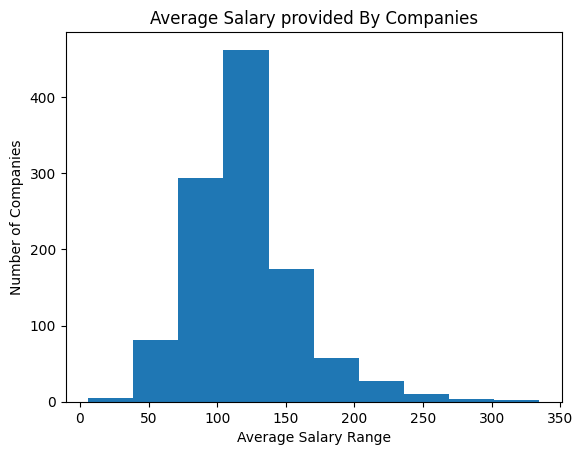

In [49]:
# plotting avg salary provided by companies

plt.hist(df_cleaned.avg_salary)

plt.ylabel('Number of Companies')
plt.xlabel('Average Salary Range')
plt.title('Average Salary provided By Companies')

plt.show()

In [50]:
count_of_jobs_by_state = df_cleaned.state.value_counts()

In [51]:
count_of_jobs_by_state

state
ca                225
remote             92
va                 82
nj                 74
ma                 64
tx                 50
ny                 47
oh                 47
co                 39
pa                 37
nc                 36
mi                 30
md                 29
il                 28
ut                 27
ia                 20
ri                 20
fl                 19
ct                 18
wa                 18
dc                 15
ga                 13
united states      10
az                  8
wi                  8
mo                  7
de                  6
mn                  6
la                  4
al                  4
california          4
maryland            3
ar                  3
-1                  2
in                  2
or                  2
ne                  2
nm                  2
ky                  2
new york state      1
ks                  1
nv                  1
me                  1
point loma          1
illinois            1
nd  

In [52]:
df_cleaned.columns

Index(['job_title', 'salary_estimate', 'job_description', 'rating',
       'company_name', 'location', 'size', 'founded', 'type_of_ownership',
       'industry', 'sector', 'revenue', 'hourly', 'min_salary', 'max_salary',
       'avg_salary', 'state'],
      dtype='object')

In [53]:
chart_columns = ['job_title', 'sector', 'state']

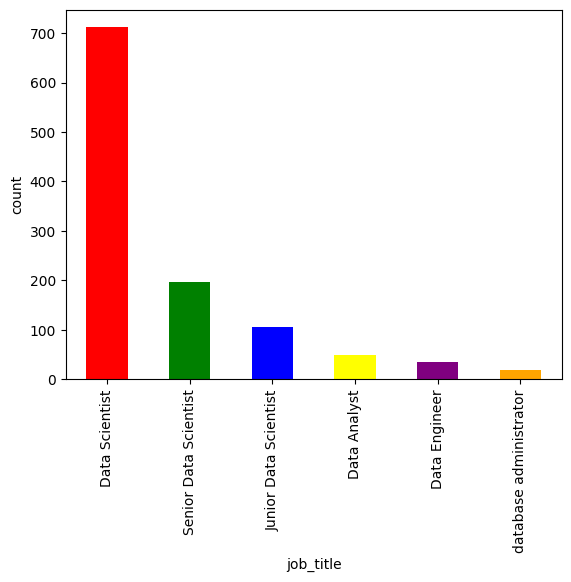

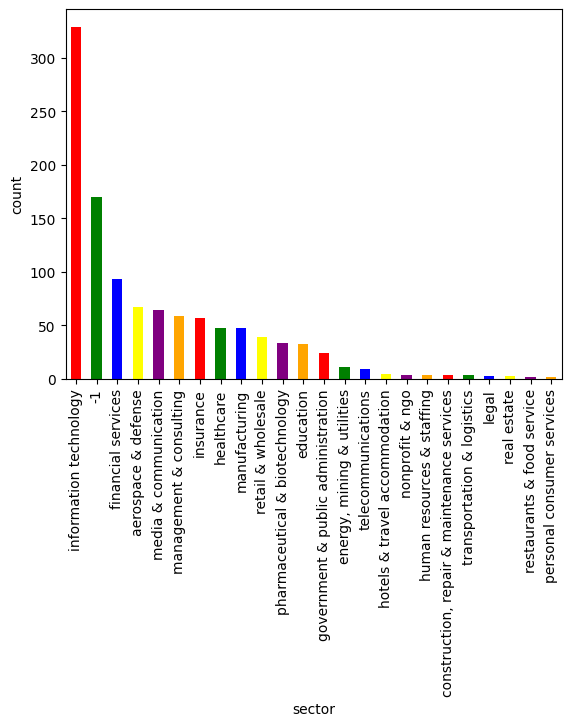

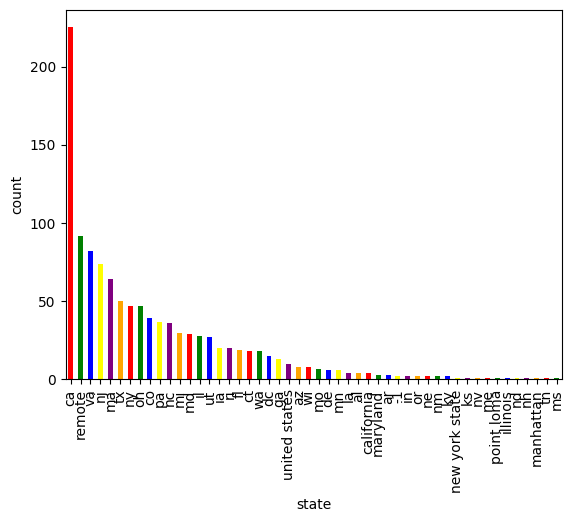

In [54]:
for i in chart_columns:
    df_cleaned[i].value_counts().plot(kind='bar', color=colors)
    plt.xlabel(i)
    plt.ylabel('count')
    plt.xticks(rotation=90) #rotate axis labels for readability
#   plt.tight_layout() #adjust layout to prevent clipping of labels
    plt.show()

In [55]:
pd.pivot_table(df_cleaned, index='job_title', values='avg_salary')

,avg_salary
job_title,
Data Analyst,104.234694
Data Engineer,86.371429
Data Scientist,119.120787
Junior Data Scientist,106.828571
Senior Data Scientist,146.739796
database administrator,112.500000


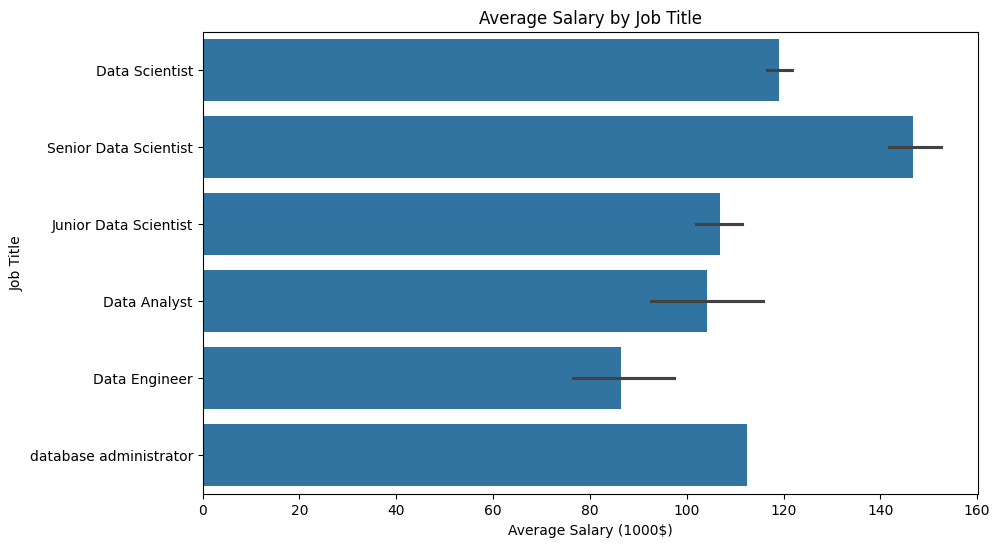

In [59]:
df_cleaned_ordered = df_cleaned.sort_values(by='avg_salary', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='avg_salary', y='job_title', data=df_cleaned_ordered, orient='h', order=df_cleaned_ordered['job_title'].value_counts().head(15).index)
plt.xlabel('Average Salary (1000$)')
plt.ylabel('Job Title')
plt.title('Average Salary by Job Title')
plt.show()